In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
from sklearn import preprocessing

In [92]:
coefs = [-23.285050633578802, -0.0, 0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, -0.0, -0.0,
0.0, 0.5997235161731648, -0.0, 0.0, 0.4465041990731103,
-0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, 0.19797758578512634, -0.0, 0.469367996497442, 0.0,
0.0, 0.0, -0.0, -0.03745621099255962, 0.0,
0.0, 0.020329356286579846, -0.0, -0.0, -0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, -0.0, -0.031092757171782368,
-0.0, 0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, -1.384897088295993,
-0.0, -0.0, -0.0, 0.0, 0.0,
0.0, 0.0, -0.0, -0.0, -0.0,
-0.0, 0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, 0.0, 0.0, -0.0, -0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, 0.0, -0.0,
-0.0, 0.0, 0.0, -0.0, -0.0,
0.0, 0.0, 0.0, 0.0, -0.0,
-0.0, -0.0, -0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, -0.0, -0.0, -0.0, -0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, -0.0,
-0.0, 0.0, 0.0, 0.0, 0.0,
-0.0, -0.0, 0.0, 0.0, 0.0,
0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, 0.19134160483385762]

coef_number = []

for i,coef in enumerate(coefs):
    if coef != 0:
        print(i,coef)
        coef_number.append(i)

df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv")
print(len(df.columns),len(coefs))
print("final")
for j,column in enumerate(df.columns):
    if j in coef_number:
        print(column)

0 -23.285050633578802
12 0.5997235161731648
15 0.4465041990731103
22 0.19797758578512634
24 0.469367996497442
29 -0.03745621099255962
32 0.020329356286579846
45 -0.031092757171782368
55 -1.384897088295993
173 0.19134160483385762
174 174
final
PDB code
 HBD_Nam_COUNT
 HBD_O3_COUNT
 HBA_O3_COUNT
 HBA_Oco2_COUNT
 ENV_HBA_N_OCC_SUM
 ENV_HBA_O_OCC_MAX
 H_H_SCORE_SUM
 HBD_N3_HBA_N_SCORE_SUM
 VDW_ENERGY


In [93]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_refined_set_all_grail_scores.csv") # final

# sns.set_theme('poster')
fig, ax = plt.subplots(1,1)
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(), ax=ax,cmap=cmap,vmin=-1,vmax=1)
fig.set_size_inches(120,100)
ax.set_xticks([i-0.5 for i in range(len(df.columns))], df.columns)
ax.set_yticks([i-0.5 for i in range(len(df.columns))], df.columns)
fig.savefig("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/heatmap_final.svg")

<AxesSubplot:>

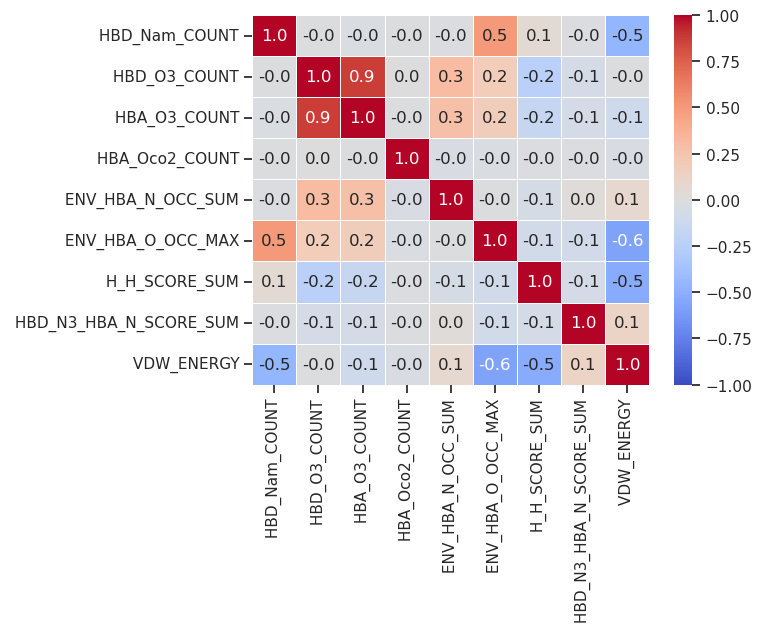

In [94]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv") # final
relevant = [" HBD_Nam_COUNT"," HBD_O3_COUNT"," HBA_O3_COUNT"," HBA_Oco2_COUNT"," ENV_HBA_N_OCC_SUM"," ENV_HBA_O_OCC_MAX"," H_H_SCORE_SUM"," HBD_N3_HBA_N_SCORE_SUM"," VDW_ENERGY"]
df = df[relevant]

# sns.set_theme('poster')
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.5,cmap=cmap,vmin=-1,vmax=1)

In [95]:
featurepath = "/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_refined_set_all_grail_scores.csv" # final
experimentpath = "/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_refined_set_all.csv"

identifier = "PDB code"

features = pd.read_csv(featurepath, dtype={identifier: str})
experiment = pd.read_csv(experimentpath, dtype={identifier: str})
experiment = experiment.sort_values(identifier)
experiment = experiment.reset_index(drop=True)
experiment = experiment["pKd pKi pIC50"]

features_num = features.drop(labels=identifier,axis=1)
scaler = preprocessing.StandardScaler().fit(features_num)

X = scaler.transform(features_num)
y = experiment

for i in range(5,36,5):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_final_slim{i}_f_regression.csv")
    
    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_final_slim{i}_f_regression.csv")


for i in range(5,36,5):
    selector = SelectKBest(r_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_final_slim{i}_r_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_final_slim{i}_r_regression.csv")

for i in range(5,36,5):
    selector = SelectKBest(mutual_info_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_final_slim{i}_mutual_info_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_final_slim{i}_mutual_info_regression.csv")

estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=5)
selector = selector.fit(X, y)
selection = [identifier]
for j in selector.get_feature_names_out(input_features=features_num.keys()):
    selection.append(j)
sub_features = features[selection]
sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_final_RFECV.csv")

core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_core_set_all_grail_scores.csv", dtype={identifier: str})
core_new = core[selection]
core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_final_RFECV.csv")

/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlatio

In [96]:
coefs = [-23.48342007191967, -0.0, 0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, -0.0, -0.0,
0.0, 0.265905035654603, -0.0, 0.0, 0.43796709912688014,
-0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, 0.0, -0.0, 0.11756629848321128, 0.0,
0.0, -0.0, 0.04878372328926339, -0.0, -0.0,
0.017394925819280364, -0.006028587783450633, 0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, 0.0, 0.0,
0.0, 0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, -1.9051485307081577, -0.0, -0.0,
-0.0, 0.0, 0.0, 0.0, 0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, -0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, 0.0, 0.0,
0.0, -0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, 0.0,
0.0, -0.0, -0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, -0.0,
0.0, 0.0, -0.0, -0.0, 0.0,
0.0, -0.0, -0.0, 0.0, 0.0,
0.0, 0.0, -0.0, -0.0, -0.0,
-0.0, 0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, 0.0, -0.0,
-0.0, 0.0, 0.0, -0.0, -0.0,
-0.0, -0.0, 0.0, 0.0, -0.0,
-0.0, -0.0, -0.0, 0.0, 0.0,
-0.0, -0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, -0.0, -0.0, 0.0,
0.0, 0.0, 0.0, -0.0, -0.0,
0.0, 0.0, 0.0, 0.0, -0.0,
-0.0, -0.0, -0.0, -0.0, -0.0,
0.17755395205485644, 0.14532076392323554]

coef_number = []

for i,coef in enumerate(coefs):
    if coef != 0:
        print(i,coef)
        coef_number.append(i)

df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr.csv")
print(len(df.columns),len(coefs))
print("GAP")
for j,column in enumerate(df.columns):
    if j in coef_number:
        print(column)

0 -23.48342007191967
12 0.265905035654603
15 0.43796709912688014
24 0.11756629848321128
28 0.04878372328926339
31 0.017394925819280364
32 -0.006028587783450633
58 -1.9051485307081577
176 0.17755395205485644
177 0.14532076392323554
178 178
GAP
PDB code
 HBD_Nam_COUNT
 HBD_O3_COUNT
 HBA_Oco2_COUNT
 ROT_BOND_COUNT
 TPSA
 ENV_HBA_N_OCC_SUM
 HBD_N3_HBA_N_SCORE_SUM
 VDW_ENERGY_ATT
 VDW_ENERGY_REP


In [97]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr.csv") #GAP

# sns.set_theme('poster')
fig, ax = plt.subplots(1,1)
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(), ax=ax,cmap=cmap,vmin=-1,vmax=1)
fig.set_size_inches(120,100)
ax.set_xticks([i-0.5 for i in range(len(df.columns))], df.columns)
ax.set_yticks([i-0.5 for i in range(len(df.columns))], df.columns)
fig.savefig("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/heatmap_GAP.svg")

<AxesSubplot:>

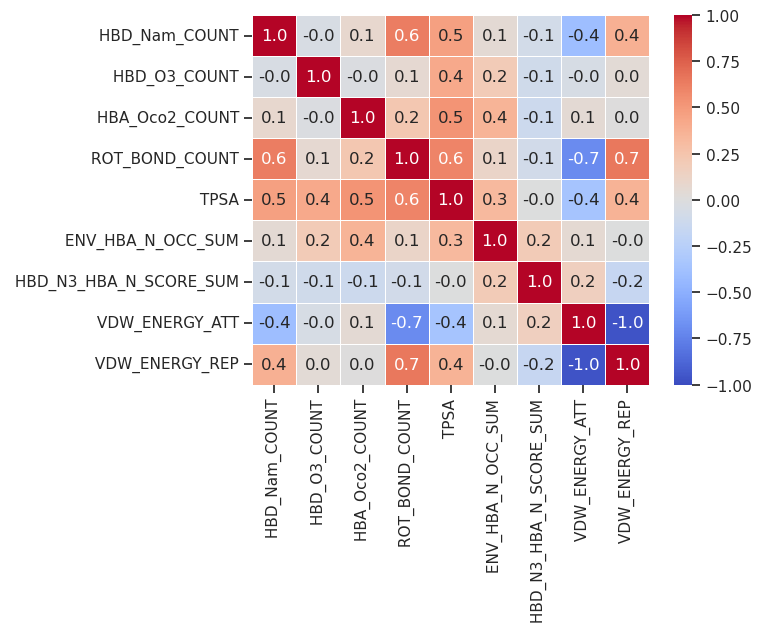

In [98]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr.csv") # GAP
relevant = [" HBD_Nam_COUNT"," HBD_O3_COUNT"," HBA_Oco2_COUNT"," ROT_BOND_COUNT"," TPSA"," ENV_HBA_N_OCC_SUM"," HBD_N3_HBA_N_SCORE_SUM"," VDW_ENERGY_ATT"," VDW_ENERGY_REP"]
df = df[relevant]

# sns.set_theme('poster')
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.5,cmap=cmap,vmin=-1,vmax=1)

In [101]:
featurepath = "/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr.csv" # GAP
experimentpath = "/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_refined_set_all.csv"

identifier = "PDB code"

features = pd.read_csv(featurepath, dtype={identifier: str})
experiment = pd.read_csv(experimentpath, dtype={identifier: str})
experiment = experiment.sort_values(identifier)
experiment = experiment.reset_index(drop=True)
experiment = experiment["pKd pKi pIC50"]

features_num = features.drop(labels=identifier,axis=1)
scaler = preprocessing.StandardScaler().fit(features_num)

X = scaler.transform(features_num)
y = experiment

for i in range(5,36,5):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_GAP_slim{i}_f_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_GAP_slim{i}_f_regression.csv")

for i in range(5,36,5):
    selector = SelectKBest(r_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_GAP_slim{i}_r_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_GAP_slim{i}_r_regression.csv")

for i in range(5,36,5):
    selector = SelectKBest(mutual_info_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_GAP_slim{i}_mutual_info_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_GAP_slim{i}_mutual_info_regression.csv")

estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=5)
selector = selector.fit(X, y)
selection = [identifier]
for j in selector.get_feature_names_out(input_features=features_num.keys()):
    selection.append(j)
sub_features = features[selection]
sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_GAP_RFECV.csv")

core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv", dtype={identifier: str})
core_new = core[selection]
core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_GAP_RFECV.csv")

/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlatio

KeyboardInterrupt: 

In [ ]:
coefs = [-24.246245999558955, -0.0, 0.0, -0.0, -0.09293752000980532, 0.0,
0.0, -0.0, 0.0, 0.0, 0.07312183924283548,
-0.0, -0.0, 0.017480607740203036, 0.0, 0.09484477334166895,
0.0, 0.0, -0.0, -0.0, -0.0,
-0.0, -0.0, -0.0, 0.0, 0.0,
-0.0, 0.040909184259136935, 0.0, 0.0, -0.0,
-0.0, -0.0, -0.0, 0.17129220677685247, 0.1430293900763035]

coef_number = []

for i,coef in enumerate(coefs):
    if coef != 0:
        print(i,coef)
        coef_number.append(i)

df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs.csv")
print(len(df.columns),len(coefs))
print("simple")
for j,column in enumerate(df.columns):
    if j in coef_number:
        print(column)

0 -24.246245999558955
4 -0.09293752000980532
10 0.07312183924283548
13 0.017480607740203036
15 0.09484477334166895
27 0.040909184259136935
34 0.17129220677685247
35 0.1430293900763035
36 36
simple
PDB code
 H_COUNT
 ROT_BOND_COUNT
 TPSA
 ENV_HBA_OCC_MAX
 HBD_HBA_SCORE_MAX
 VDW_ENERGY_ATT
 VDW_ENERGY_REP


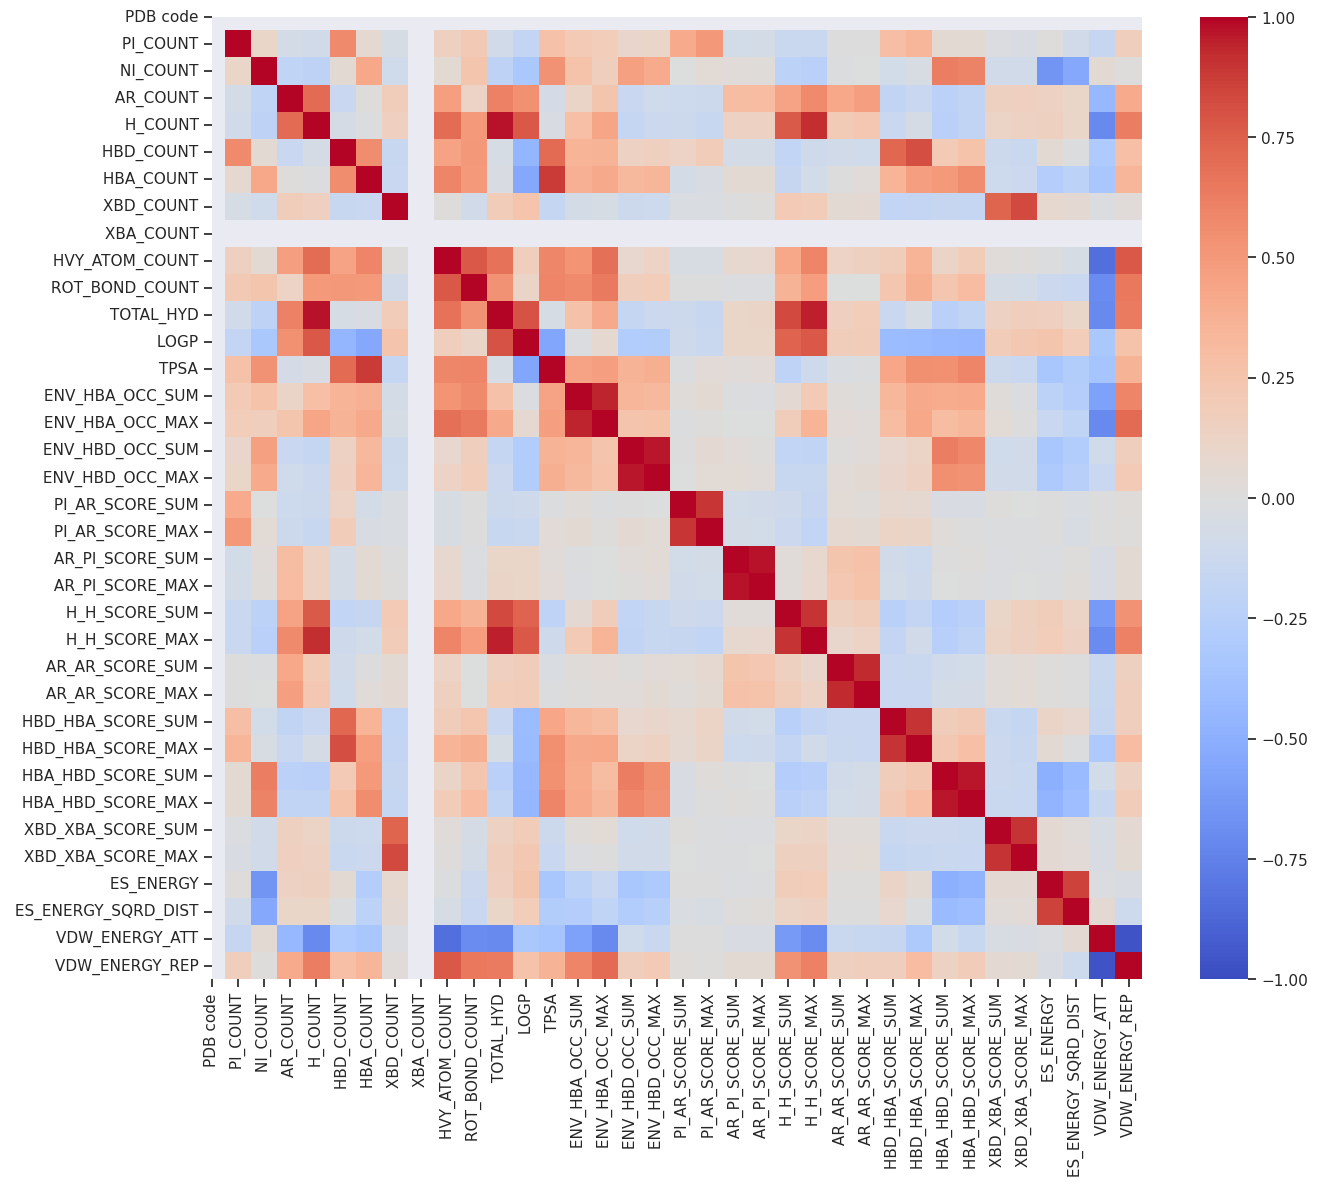

In [ ]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs.csv") #slim

# sns.set_theme('poster')
fig, ax = plt.subplots(1,1)
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(),ax=ax,cmap=cmap,vmin=-1,vmax=1)
fig.set_size_inches(15,12.5)
ax.set_xticks([i-0.5 for i in range(len(df.columns))], df.columns)
ax.set_yticks([i-0.5 for i in range(len(df.columns))], df.columns)
fig.savefig("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/heatmap_slim.svg")

Index(['PDB code', ' PI_COUNT', ' NI_COUNT', ' AR_COUNT', ' H_COUNT',
       ' HBD_COUNT', ' HBA_COUNT', ' XBD_COUNT', ' XBA_COUNT',
       ' HVY_ATOM_COUNT', ' ROT_BOND_COUNT', ' TOTAL_HYD', ' LOGP', ' TPSA',
       ' ENV_HBA_OCC_SUM', ' ENV_HBA_OCC_MAX', ' ENV_HBD_OCC_SUM',
       ' ENV_HBD_OCC_MAX', ' PI_AR_SCORE_SUM', ' PI_AR_SCORE_MAX',
       ' AR_PI_SCORE_SUM', ' AR_PI_SCORE_MAX', ' H_H_SCORE_SUM',
       ' H_H_SCORE_MAX', ' AR_AR_SCORE_SUM', ' AR_AR_SCORE_MAX',
       ' HBD_HBA_SCORE_SUM', ' HBD_HBA_SCORE_MAX', ' HBA_HBD_SCORE_SUM',
       ' HBA_HBD_SCORE_MAX', ' XBD_XBA_SCORE_SUM', ' XBD_XBA_SCORE_MAX',
       ' ES_ENERGY', ' ES_ENERGY_SQRD_DIST', ' VDW_ENERGY_ATT',
       ' VDW_ENERGY_REP'],
      dtype='object')


<AxesSubplot:>

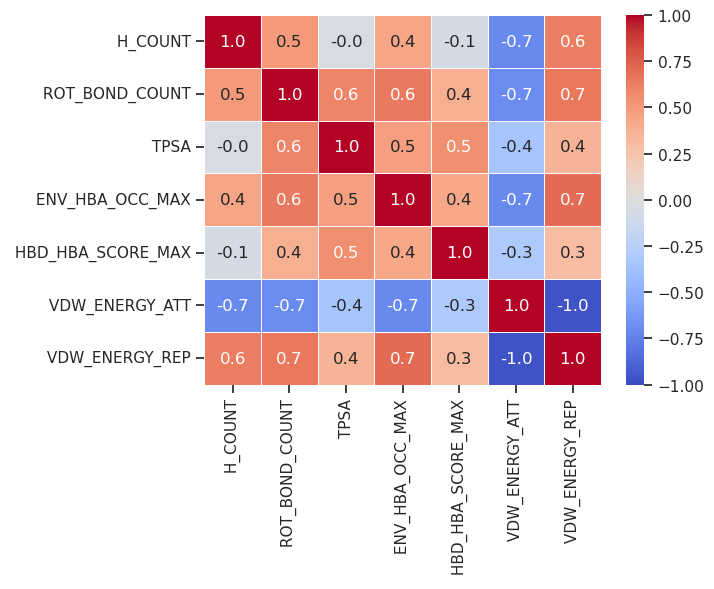

In [ ]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs.csv") # slim
print(df.keys())
relevant = [" H_COUNT"," ROT_BOND_COUNT"," TPSA"," ENV_HBA_OCC_MAX"," HBD_HBA_SCORE_MAX"," VDW_ENERGY_ATT"," VDW_ENERGY_REP"]
df = df[relevant]

# sns.set_theme('poster')
cmap = sns.color_palette("coolwarm",as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.5,cmap=cmap,vmin=-1,vmax=1)

In [ ]:
featurepath = "/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs.csv" # slim
experimentpath = "/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_refined_set_all.csv"

identifier = "PDB code"

features = pd.read_csv(featurepath, dtype={identifier: str})
experiment = pd.read_csv(experimentpath, dtype={identifier: str})
experiment = experiment.sort_values(identifier)
experiment = experiment.reset_index(drop=True)
experiment = experiment["pKd pKi pIC50"]

features_num = features.drop(labels=identifier,axis=1)
scaler = preprocessing.StandardScaler().fit(features_num)

X = scaler.transform(features_num)
y = experiment

for i in range(5,36,5):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_slim_slim{i}_f_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_slim_slim{i}_f_regression.csv")

for i in range(5,36,5):
    selector = SelectKBest(r_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_slim_slim{i}_r_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_slim_slim{i}_r_regression.csv")

for i in range(5,36,5):
    selector = SelectKBest(mutual_info_regression, k=i)
    selector.fit(X,y)
    selection = [identifier]
    for j in selector.get_feature_names_out(input_features=features_num.keys()):
        selection.append(j)
    sub_features = features[selection]
    sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_slim_slim{i}_mutual_info_regression.csv")

    core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs.csv", dtype={identifier: str})
    core_new = core[selection]
    core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_slim_slim{i}_mutual_info_regression.csv")

estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=5)
selector = selector.fit(X, y)
selection = [identifier]
for j in selector.get_feature_names_out(input_features=features_num.keys()):
    selection.append(j)
sub_features = features[selection]
sub_features.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/ref_set_slim_RFECV.csv")

core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs.csv", dtype={identifier: str})
core_new = core[selection]
core_new.to_csv(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/slim/core_set_slim_RFECV.csv")

/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlatio

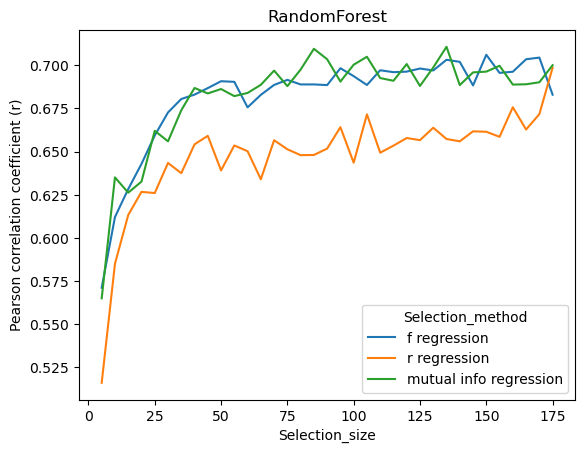

In [7]:
df = pd.read_csv("../results/feature_selection_results.csv")
df.query(f"Modeltype == 'RandomForest'",inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df[['Featuretype', 'tmp0','tmp1','tmp2',"tmp3"]] = df['add. information'].str.split(' ', expand=True)
df.fillna("",inplace=True)
# df.dropna(inplace=True)
df['Selection_size'] = df['tmp0']
df['Selection_method'] = df[['tmp1','tmp2',"tmp3"]].agg(' '.join,axis=1)
df.drop(['add. information','tmp0','tmp1','tmp2',"tmp3"],axis=1,inplace=True)
df.query("Scoretype == 'pKd pKi pIC50'",inplace=True)
df.query("Datatype == 'ki'",inplace=True)
df.query("Featuretype == 'GAP'",inplace=True)
df.query("Selection_size != 'RFECV'",inplace=True)
df['Selection_size'] = df['Selection_size'].str.replace('size','',regex=True)
df['Selection_size'] = df['Selection_size'].astype(int)
df['Pearson correlation coefficient (r)'] = df['Pearson correlation coefficient (r)'].astype(float)
sns.lineplot(data=df,x="Selection_size",y='Pearson correlation coefficient (r)',hue="Selection_method").set(title="RandomForest")
plt.show()


In [16]:

sns.lineplot(data=df,x="Selection_size",y='Pearson correlation coefficient (r)',hue="Selection_method").set(title="RandomForest")

[Text(0.5, 1.0, 'RandomForest')]

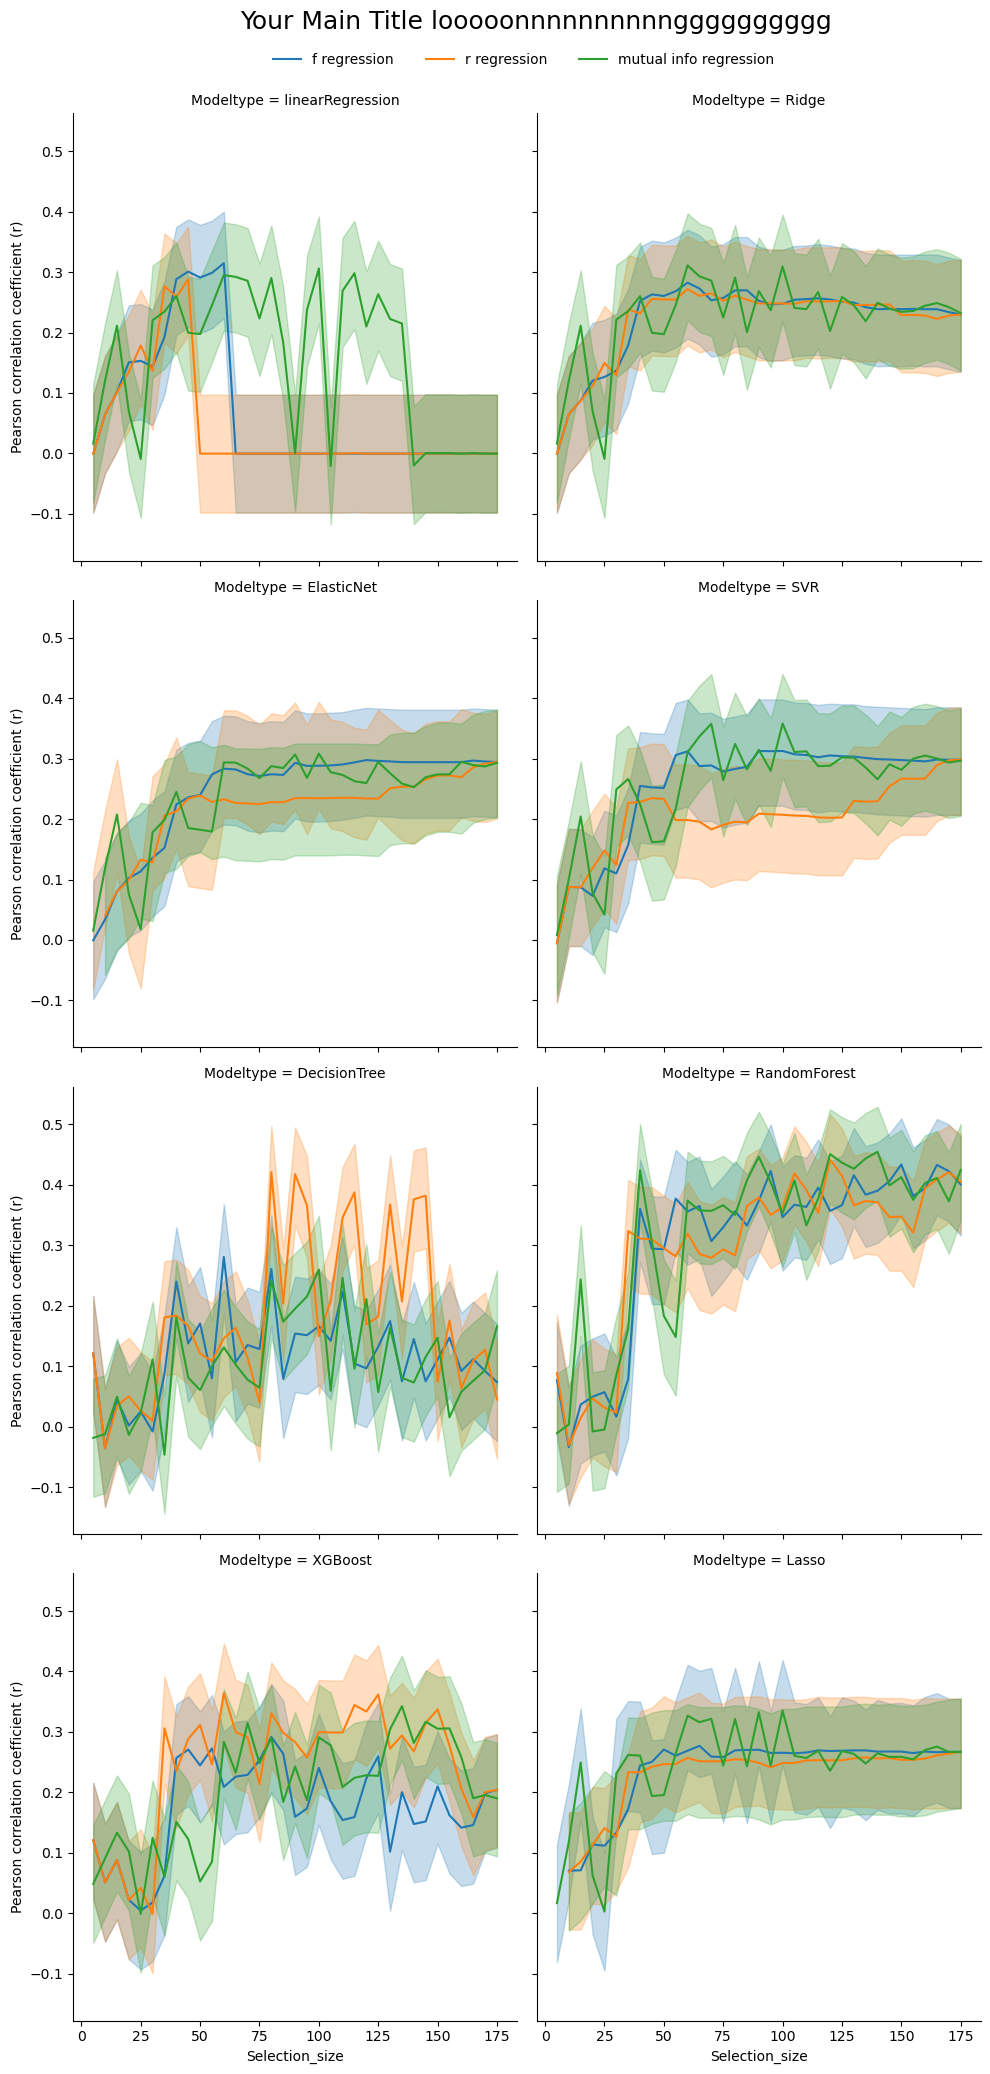

In [48]:
df = pd.read_csv("../results/feature_selection_results.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df[['Featuretype', 'tmp0','tmp1','tmp2',"tmp3"]] = df['add. information'].str.split(' ', expand=True)
df.fillna("",inplace=True)
# df.dropna(inplace=True)
df['Selection_size'] = df['tmp0']
df['Selection_method'] = df[['tmp1','tmp2',"tmp3"]].agg(' '.join,axis=1)
df.drop(['add. information','tmp0','tmp1','tmp2',"tmp3"],axis=1,inplace=True)
df.query(f"Scoretype == 'Affinity Data Value'",inplace=True)
df.query(f"Datatype == 'all'",inplace=True)
df.query(f"Featuretype == 'GAP'",inplace=True)
df.query("Selection_size != 'RFECV'",inplace=True)
df['Selection_size'] = df['Selection_size'].str.replace('size','',regex=True)
df['Selection_size'] = df['Selection_size'].astype(int)
df = df[df['Pearson correlation coefficient (r)'] != ""]
df['Pearson correlation coefficient (r)'] = df['Pearson correlation coefficient (r)'].astype(float)
df[["lower","upper"]] = df["90% Confidence interval"].str.split('~',expand=True)
df["lower"] = df["lower"].str.replace("[","",regex=True)
df["upper"] = df["upper"].str.replace("]","",regex=True)
df["lower"] = df["lower"].astype(float)
df["upper"] = df["upper"].astype(float)

g = sns.FacetGrid(df,col="Modeltype",col_wrap=2,sharey=True,hue="Selection_method",height=5)
g.map(sns.lineplot,"Selection_size","Pearson correlation coefficient (r)").add_legend(title="Selection Method")
for ax, model_type in zip(g.axes.flat, df['Modeltype'].unique()):
    data_subset = df[df['Modeltype'] == model_type]
    for method, color in zip(data_subset['Selection_method'].unique(), sns.color_palette()):
        subset = data_subset[data_subset['Selection_method'] == method]
        ax.fill_between(subset["Selection_size"], subset["lower"], subset["upper"], alpha=0.25, color=color)
fig = plt.gcf()
fig.text(0.45, 1.025, "Your Main Title looooonnnnnnnnnngggggggggg", ha='center', fontsize=18)  # Adjust the position and text for the title
sns.move_legend(g,"lower center",bbox_to_anchor=(.44,1),ncol=3, title=None, frameon=False)

g.savefig(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/feature_selection/test.png")
plt.show()

In [50]:
featuretypes = ["final", "GAP", "slim"]
scoretypes = ["delta G","Affinity Data Value","pKd pKi pIC50"]
datatypes = ["all","ki","kd"]

for feature in featuretypes:
    for score in scoretypes:
        for data in datatypes:
            df = pd.read_csv("../results/feature_selection_results.csv")
            df.drop('Unnamed: 0',axis=1,inplace=True)
            df[['Featuretype', 'tmp0','tmp1','tmp2',"tmp3"]] = df['add. information'].str.split(' ', expand=True)
            df.fillna("",inplace=True)
            # df.dropna(inplace=True)
            df['Selection_size'] = df['tmp0']
            df['Selection_method'] = df[['tmp1','tmp2',"tmp3"]].agg(' '.join,axis=1)
            df.drop(['add. information','tmp0','tmp1','tmp2',"tmp3"],axis=1,inplace=True)
            df.query(f"Scoretype == '{score}'",inplace=True)
            df.query(f"Datatype == '{data}'",inplace=True)
            df.query(f"Featuretype == '{feature}'",inplace=True)
            df.query("Selection_size != 'RFECV'",inplace=True)
            df['Selection_size'] = df['Selection_size'].str.replace('size','',regex=True)
            df['Selection_size'] = df['Selection_size'].astype(int)
            df = df[df['Pearson correlation coefficient (r)'] != ""]
            df['Pearson correlation coefficient (r)'] = df['Pearson correlation coefficient (r)'].astype(float)
            df[["lower","upper"]] = df["90% Confidence interval"].str.split('~',expand=True)
            df["lower"] = df["lower"].str.replace("[","",regex=True)
            df["upper"] = df["upper"].str.replace("]","",regex=True)
            df["lower"] = df["lower"].astype(float)
            df["upper"] = df["upper"].astype(float)

            g = sns.FacetGrid(df,col="Modeltype",col_wrap=2,sharey=True,hue="Selection_method",height=5)
            g.map(sns.lineplot,"Selection_size","Pearson correlation coefficient (r)").add_legend(title="Selection Method")
            for ax, model_type in zip(g.axes.flat, df['Modeltype'].unique()):
                data_subset = df[df['Modeltype'] == model_type]
                for method, color in zip(data_subset['Selection_method'].unique(), sns.color_palette()):
                    subset = data_subset[data_subset['Selection_method'] == method]
                    ax.fill_between(subset["Selection_size"], subset["lower"], subset["upper"], alpha=0.25, color=color)
            fig = plt.gcf()
            fig.text(0.45, 1.025, f"{feature} {data} {score}", ha='center', fontsize=18)  # Adjust the position and text for the title
            sns.move_legend(g,"lower center",bbox_to_anchor=(.44,1),ncol=3, title=None, frameon=False)

            if " " in score:
                score = score.replace(" ","_")

            g.savefig(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/feature_selection/{feature}_{data}_{score}.png")

            if "_" in score:
                score = score.replace("_"," ")
            
            plt.clf()

            print(f"{feature} {data} {score} Done!")

print("Finished!")    


final all delta G Done!
final ki delta G Done!
final kd delta G Done!
final all Affinity Data Value Done!
final ki Affinity Data Value Done!
final kd Affinity Data Value Done!
final all pKd pKi pIC50 Done!
final ki pKd pKi pIC50 Done!
final kd pKd pKi pIC50 Done!
GAP all delta G Done!
GAP ki delta G Done!
GAP kd delta G Done!
GAP all Affinity Data Value Done!
GAP ki Affinity Data Value Done!
GAP kd Affinity Data Value Done!
GAP all pKd pKi pIC50 Done!
GAP ki pKd pKi pIC50 Done!
GAP kd pKd pKi pIC50 Done!
slim all delta G Done!
slim ki delta G Done!
slim kd delta G Done!
slim all Affinity Data Value Done!
slim ki Affinity Data Value Done!
slim kd Affinity Data Value Done!
slim all pKd pKi pIC50 Done!
slim ki pKd pKi pIC50 Done!
slim kd pKd pKi pIC50 Done!


In [18]:
featuretypes = ["final", "GAP", "slim"]
scoretypes = ["delta G","Affinity Data Value","pKd pKi pIC50"]
datatypes = ["all","ki","kd"]

for feature in featuretypes:
    for score in scoretypes:
        for data in datatypes:
            df = pd.read_csv("../results/feature_selection_results2.csv")
            df.drop('Unnamed: 0',axis=1,inplace=True)
            df[['Featuretype', 'tmp0','tmp1','tmp2',"tmp3"]] = df['add. information'].str.split(' ', expand=True)
            df.fillna("",inplace=True)
            # df.dropna(inplace=True)
            df['Selection_size'] = df['tmp0']
            df['Selection_method'] = df[['tmp1','tmp2',"tmp3"]].agg(' '.join,axis=1)
            df.drop(['add. information','tmp0','tmp1','tmp2',"tmp3"],axis=1,inplace=True)
            df.query(f"Scoretype == '{score}'",inplace=True)
            df.query(f"Datatype == '{data}'",inplace=True)
            df.query(f"Featuretype == '{feature}'",inplace=True)
            df.query("Selection_size == 'RFECV'",inplace=True)
            df = df[df['Pearson correlation coefficient (r)'] != ""]
            df['Pearson correlation coefficient (r)'] = df['Pearson correlation coefficient (r)'].astype(float)
            df[["lower","upper"]] = df["90% Confidence interval"].str.split('~',expand=True)
            df["lower"] = df["lower"].str.replace("[","",regex=True)
            df["upper"] = df["upper"].str.replace("]","",regex=True)
            df["lower"] = df["lower"].astype(float)
            df["upper"] = df["upper"].astype(float)
            cols = ['steelblue' if x < -0.6 or x > 0.6 else 'grey' for x in df["Pearson correlation coefficient (r)"]]

            g = sns.FacetGrid(df,col="Modeltype",col_wrap=2,sharey=True,height=5)
            g.map(sns.barplot,"Pearson correlation coefficient (r)","Selection_method")
            fig = plt.gcf()
            fig.text(0.45, 1.005, f"{feature} {data} {score}", ha='center', fontsize=18)  # Adjust the position and text for the title
            
            g.savefig(f"/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/results/feature_selection/RFECV_{feature}_{data}_{score}.png")

            # plt.show()
            plt.clf()
            
            print(f"{feature} {data} {score} Done!")

print("Finished!")    


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final all delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final ki delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final kd delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final all Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final ki Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final kd Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final all pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final ki pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


final kd pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP all delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP ki delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP kd delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP all Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP ki Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP kd Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP all pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP ki pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


GAP kd pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim all delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim ki delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim kd delta G Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim all Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim ki Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim kd Affinity Data Value Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim all pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim ki pKd pKi pIC50 Done!


/home/cfellinger/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


slim kd pKd pKi pIC50 Done!
Finished!
